Start Time
1692329692.9873793
End Time
1692329715.0801694
Runtime (min)
0.3682131687800089


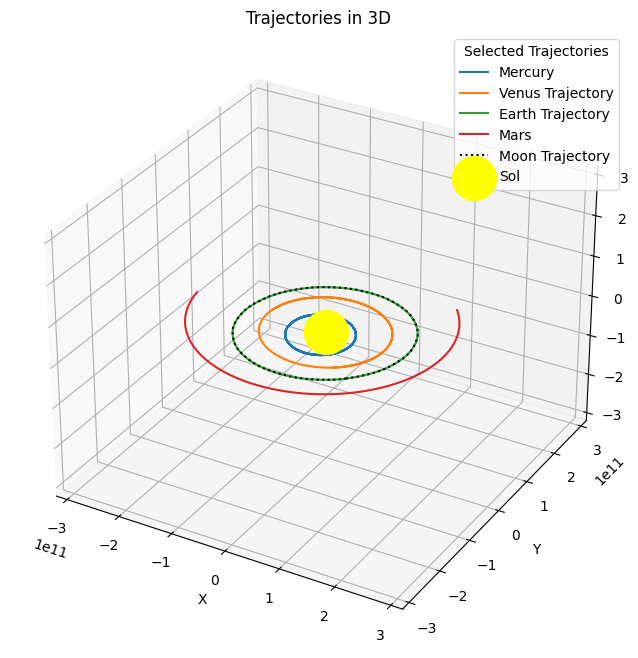

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
start_time = time.time()
print("Start Time")
print(start_time)
#how long to run and how many timesteps will we do
days = 365 * 1
#divide timescale by a specified amount(higher numbers make code faster, but less accurate)
step_division = 10000
#change the velocities of bodies by a factor
velocity_scaling = 1
# Gravitational constant
G = 6.67430 * 10**-11
#Increase or decrease the Sun's mass (make black holes or neutron stars, etc.)
solar_mass = 1
# Masses of celestial bodies (in kg) taken from NASA Jet Propulsion Laboratory Horizons system
m_star = solar_mass * 1988500 * 10 ** 24
m_planet1 = 3.302 * 10 ** 23
m_planet2 = 48.6850 * 10 ** 23
m_planet3 = 5.97219 * 10 ** 24
m_planet4 = 6.4171 * 10 ** 23
m_moon = 7.349 * 10 ** 22

#Define system for Runge-Kutta
def system(t, values):

    [x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1,
     x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2,
     x_p3, y_p3, z_p3, vx_p3, vy_p3, vz_p3,
     x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_p4,
     x_m, y_m, z_m, vx_m, vy_m, vz_m,
     x_s, y_s, z_s, vx_s, vy_s, vz_s] = values

    #Sun Equations
    r_s_p1 = np.sqrt((x_p1 - x_s) ** 2 + (y_p1 - y_s) ** 2 + (z_p1 - z_s) ** 2)
    r_s_p2 = np.sqrt((x_p2 - x_s) ** 2 + (y_p2 - y_s) ** 2 + (z_p2 - z_s) ** 2)
    r_s_p3 = np.sqrt((x_p3 - x_s) ** 2 + (y_p3 - y_s) ** 2 + (z_p3 - z_s) ** 2)
    r_s_p4 = np.sqrt((x_p4 - x_s) ** 2 + (y_p4 - y_s) ** 2 + (z_p4 - z_s) ** 2)
    r_s_m = np.sqrt((x_m - x_s)**2 + (y_m - y_s)**2 + (z_m - z_s)**2)
    ax_s = -G * (m_planet1 * (x_s - x_p1) / r_s_p1 ** 3 +
                 m_planet2 * (x_s - x_p2) / r_s_p2 ** 3 +
                 m_planet3 * (x_s - x_p3) / r_s_p3 ** 3 +
                 m_planet4 * (x_s - x_p4) / r_s_p4 ** 3 +
                 m_moon * (x_s - x_m) / r_s_m ** 3)
    ay_s = -G * (m_planet1 * (y_s - y_p1) / r_s_p1 ** 3 +
                 m_planet2 * (y_s - y_p2) / r_s_p2 ** 3 +
                 m_planet3 * (y_s - y_p3) / r_s_p3 ** 3 +
                 m_planet4 * (y_s - y_p4) / r_s_p4 ** 3 +
                 m_moon * (y_s - y_m) / r_s_m ** 3)
    az_s = -G * (m_planet1 * (z_s - z_p1) / r_s_p1 ** 3 +
                 m_planet2 * (z_s - z_p2) / r_s_p2 ** 3 +
                 m_planet3 * (z_s - z_p3) / r_s_p3 ** 3 +
                 m_planet4 * (z_s - z_p4) / r_s_p4 ** 3 +
                 m_moon * (z_s - z_m) / r_s_m ** 3)

    #Planet 1 equations
    r_p1_s = r_s_p1
    r_p1_p2 = np.sqrt((x_p1 - x_p2)**2 + (y_p1 - y_p2)**2 + (z_p1 - z_p2)**2)
    r_p1_p3 = np.sqrt((x_p1 - x_p3) ** 2 + (y_p1 - y_p3) ** 2 + (z_p1 - z_p3) ** 2)
    r_p1_p4 = np.sqrt((x_p1 - x_p4) ** 2 + (y_p1 - y_p4) ** 2 + (z_p1 - z_p4) ** 2)
    r_p1_m = np.sqrt((x_p1 - x_m) ** 2 + (y_p1 - y_m) ** 2 + (z_p1 - z_m) ** 2)
    ax_p1 = -G * (m_star * (x_p1 - x_s) / r_p1_s ** 3 +
                m_planet2 * (x_p1 - x_p2) / r_p1_p2 ** 3 +
                m_planet3 * (x_p1 - x_p3) / r_p1_p3 ** 3 +
                m_planet4 * (x_p1 - x_p4) / r_p1_p4 ** 3 +
                m_moon * (x_p1 - x_m) / r_p1_m ** 3)
    ay_p1 = -G * (m_star * (y_p1 - y_s) / r_p1_s**3 +
                m_planet2 * (y_p1 - y_p2) / r_p1_p2 ** 3 +
                m_planet3 * (y_p1 - y_p3) / r_p1_p3 ** 3 +
                m_planet4 * (y_p1 - y_p4) / r_p1_p4 ** 3 +
                m_moon * (y_p1 - y_m) / r_p1_m ** 3)
    az_p1 = -G * (m_star * (z_p1 - z_s) / r_p1_s ** 3 +
                m_planet2 * (z_p1 - z_p2) / r_p1_p2 ** 3 +
                m_planet3 * (z_p1 - z_p3) / r_p1_p3 ** 3 +
                m_planet4 * (z_p1 - z_p4) / r_p1_p4 ** 3 +
                m_moon * (z_p1 - z_m) / r_p1_m ** 3)

    #Planet 2 equations
    r_p2_s = r_s_p2
    r_p2_p3 = np.sqrt((x_p2 - x_p3) ** 2 + (y_p2 - y_p3) ** 2 + (z_p2 - z_p3) ** 2)
    r_p2_p1 = np.sqrt((x_p2 - x_p1) ** 2 + (y_p2 - y_p1) ** 2 + (z_p2 - z_p1) ** 2)
    r_p2_p4 = np.sqrt((x_p2 - x_p4) ** 2 + (y_p2 - y_p4) ** 2 + (z_p2 - z_p4) ** 2)
    r_p2_m = np.sqrt((x_p2 - x_m) ** 2 + (y_p2 - y_m) ** 2 + (z_p2 - z_m) ** 2)
    ax_p2 = -G * ((m_star * (x_p2 - x_s) / r_p2_s ** 3) +
                  m_planet1 * (x_p1 - x_p2) / r_p2_p1 ** 3 +
                  m_planet3 * (x_p2 - x_p3) / r_p2_p3 ** 3 +
                  m_planet4 * (x_p2 - x_p4) / r_p2_p4 ** 3 +
                  m_moon * (x_p2 - x_m)/r_p2_m ** 3)
    ay_p2 = -G * (m_star * (y_p2 - y_s) / r_p2_s ** 3 +
                  m_planet1 * (y_p1 - y_p2) / r_p2_p1 ** 3 +
                  m_planet3 * (y_p2 - y_p3) / r_p2_p3 ** 3 +
                  m_planet4 * (y_p2 - y_p4) / r_p2_p4 ** 3 +
                  m_moon * (y_p2 - y_m) / r_p2_m ** 3)
    az_p2 = -G * (m_star * (z_p2 - z_s) / r_p2_s ** 3 +
                  m_planet1 * (z_p1 - z_p2) / r_p2_p1 ** 3 +
                  m_planet3 * (z_p2 - z_p3) / r_p2_p3 ** 3 +
                  m_planet4 * (z_p2 - z_p4) / r_p2_p4 ** 3 +
                  m_moon * (z_p2 - z_m)/r_p2_m**3)

    #Planet 3 equations
    r_p3_s = r_s_p3
    r_p3_p1 = np.sqrt((x_p3 - x_p1) ** 2 + (y_p3 - y_p1) ** 2 + (z_p3 - z_p1) ** 2)
    r_p3_p2 = np.sqrt((x_p3 - x_p2) ** 2 + (y_p3 - y_p2) ** 2 + (z_p3 - z_p2) ** 2)
    r_p3_p4 = np.sqrt((x_p3 - x_p4) ** 2 + (y_p3 - y_p4) ** 2 + (z_p3 - z_p4) ** 2)
    r_p3_m = np.sqrt((x_p3 - x_m) ** 2 + (y_p3 - y_m) ** 2 + (z_p3 - z_m) ** 2)
    ax_p3 = -G * (m_star * (x_p3 - x_s) / r_p3_s ** 3 +
                  m_planet1 * (x_p3 - x_p1) / r_p3_p1 ** 3 +
                  m_planet2 * (x_p3 - x_p2) / r_p3_p2 ** 3 +
                  m_planet4 * (x_p3 - x_p4) / r_p3_p4 ** 3 +
                  m_moon * (x_p3 - x_m)/r_p3_m**3)
    ay_p3 = -G * (m_star * (y_p3 - y_s) / r_p3_s ** 3 +
                  m_planet1 * (y_p3 - y_p1) / r_p3_p1 ** 3 +
                  m_planet2 * (y_p3 - y_p2) / r_p3_p2 ** 3 +
                  m_planet4 * (y_p3 - y_p4) / r_p3_p4 ** 3 +
                  m_moon * (y_p3 - y_m)/r_p3_m ** 3)
    az_p3 = -G * (m_star * (z_p3 - z_s) / r_p3_s ** 3 +
                  m_planet1 * (z_p3 - z_p1) / r_p3_p1 ** 3 +
                  m_planet3 * (z_p3 - z_p2) / r_p3_p2 ** 3 +
                  m_planet4 * (z_p3 - z_p4) / r_p3_p4 ** 3 +
                  m_moon * (z_p3 - z_m)/r_p3_m ** 3)

    #Planet 4 equations
    r_p4_s = r_s_p4
    r_p4_p1 = np.sqrt((x_p4 - x_p1) ** 2 + (y_p4 - y_p1) ** 2 + (z_p4 - z_p1) ** 2)
    r_p4_p2 = np.sqrt((x_p4 - x_p2) ** 2 + (y_p4 - y_p2) ** 2 + (z_p4 - z_p2) ** 2)
    r_p4_p3 = np.sqrt((x_p4 - x_p3) ** 2 + (y_p4 - y_p3) ** 2 + (z_p4 - z_p3) ** 2)
    r_p4_m = np.sqrt((x_p4 - x_m) ** 2 + (y_p4 - y_m) ** 2 + (z_p4 - z_m) ** 2)
    ax_p4 = -G * (m_star * (x_p4 - x_s) / r_p4_s ** 3 +
                  m_planet1 * (x_p4 - x_p1) / r_p4_p1 ** 3 +
                  m_planet2 * (x_p4 - x_p2) / r_p4_p2 ** 3 +
                  m_planet3 * (x_p4 - x_p3) / r_p4_p3 ** 3 +
                  m_moon * (x_p4 - x_m)/r_p4_m**3)
    ay_p4 = -G * (m_star * (y_p4 - y_s) / r_p4_s ** 3 +
                  m_planet1 * (y_p4 - y_p1) / r_p4_p1 ** 3 +
                  m_planet2 * (y_p4 - y_p2) / r_p4_p2 ** 3 +
                  m_planet3 * (y_p4 - y_p3) / r_p4_p3 ** 3 +
                  m_moon * (y_p4 - y_m)/r_p4_m ** 3)
    az_p4 = -G * (m_star * (z_p4 - z_s) / r_p4_s ** 3 +
                  m_planet1 * (z_p4 - z_p1) / r_p4_p1 ** 3 +
                  m_planet2 * (x_p4 - x_p2) / r_p4_p2 ** 3 +
                  m_planet3 * (z_p4 - z_p3) / r_p4_p3 ** 3 +
                  m_moon * (z_p4 - z_m)/r_p4_m ** 3)

    #Moon equations
    r_m_p = np.sqrt((x_m - x_p3) ** 2 + (y_m - y_p3) ** 2 + (z_m - z_p3) ** 2)
    ax_m = -G * (m_star * (x_m- x_s) / (r_p3_s + r_m_p) ** 3 +
                 m_planet1 * (x_m - x_p1) / r_p1_m ** 3 +
                 m_planet2 * (x_m - x_p2) / r_p2_m ** 3 +
                 m_planet3 * (x_m - x_p3) / r_m_p ** 3 +
                 m_planet4 * (x_m - x_p4) / r_p4_m ** 3)

    ay_m = -G * (m_star * (y_m - y_s) / (r_p3_s + r_m_p) ** 3 +
                 m_planet1 * (y_m - y_p1) / r_p1_m ** 3 +
                 m_planet2 * (y_m - y_p2) / r_p2_m ** 3 +
                 m_planet3 * (y_m - y_p3) / r_m_p ** 3 +
                 m_planet4 * (y_m - y_p4) / r_p4_m ** 3)

    az_m = -G * (m_star * (z_m - z_s) / (r_p3_s + r_m_p) ** 3 +
                 m_planet1 * (z_m - z_p1) / r_p1_m ** 3 +
                 m_planet2 * (y_m - y_p2) / r_p2_m ** 3 +
                 m_planet3 * (z_m - z_p3) / r_m_p ** 3 +
                 m_planet4 * (z_m - z_p4) / r_p4_m ** 3)
    return [vx_p1, vy_p1, vz_p1, ax_p1, ay_p1, az_p1,
            vx_p2, vy_p2, vz_p2, ax_p2, ay_p2, az_p2,
            vx_p3, vy_p3, vz_p3, ax_p3, ay_p3, az_p3,
            vx_p4, vy_p4, vz_p4, ax_p4, ay_p4, az_p4,
            vx_m, vy_m, vz_m, ax_m, ay_m, az_m,
            vx_s, vy_s, vz_s, ax_s, ay_s, az_s]


#define Runge-Kutta
def runge_kutta_step(t, values, h):

    k1 = h * np.array(system(t, values))
    k2 = h * np.array(system(t + 0.5 * h, values + 0.5 * k1))
    k3 = h * np.array(system(t + 0.5 * h, values + 0.5 * k2))
    k4 = h * np.array(system(t + h, values + k3))

    return values + (k1 + 2 * k2 + 2 * k3 + k4) / 6

#Define Initial Conditions and some plotting variables
#Data taken from NASA Jet Propulsion Laboratory Horizons system (Positions and velocities valid for 8/5/2023)


planet_x10 = -3.436259033925180 * 10 ** 10
planet_y10 = -6.092867034278078 * 10 ** 10
planet_z10 = -1.891438934380110 * 10 ** 9
planet_vx10 = velocity_scaling * 3.295579749833446 * 10 ** 4
planet_vy10 = velocity_scaling * -2.098919608955980 * 10 ** 4
planet_vz10 = velocity_scaling * -4.736435577177248 * 10 ** 3


planet_x20 = 6.383226628871266 * 10 ** 10
planet_y20 = -8.745729626658575 * 10 ** 10
planet_z20 = -4.922407219715904 * 10 ** 9
planet_vx20 = velocity_scaling * 2.783251067758433 * 10 ** 4
planet_vy20 = velocity_scaling * 2.081763231593710 * 10 ** 4
planet_vz20 = velocity_scaling * -1.319642324240722 * 10 ** 3


planet_x30 = 1.003277044637069 * 10 ** 11
planet_y30 = -1.130019894655303 * 10 ** 11
planet_z30 = 3.768366392537951 * 10 ** 7
planet_vx30 = velocity_scaling * 2.164671435537538 * 10 ** 4
planet_vy30 = velocity_scaling * 1.980380283483597 * 10 ** 4
planet_vz30 = velocity_scaling * -2.145282298935847 * 10 ** -3


planet_x40 = -2.462077718584033 * 10 ** 11
planet_y40 = (0.45*-2.279351850180516) * 10 ** 8
planet_z40 = 5.567802907509421 * 10 ** 9
planet_vx40 = velocity_scaling * 3.128441031286044 * 10 ** 3
planet_vy40 = velocity_scaling * -2.207352960592294 * 10 ** 4
planet_vz40 = velocity_scaling * -5.389289339199426 * 10 ** 2

moon_x0 = 1.006911099912554 * 10 ** 11
moon_y0 = -1.130169615914975 * 10 ** 11
moon_z0 = 2.164895520276576 * 10 ** 7
moon_vx0 = velocity_scaling * 2.174673947324113 * 10 ** 4
moon_vy0 = velocity_scaling * 2.087496176325418 * 10 ** 4
moon_vz0 = velocity_scaling * 7.733498066524636* 10 ** 1


sun_x0 = -1.284673006961080 * 10 ** 9
sun_y0 = -2.632990711448950 * 10 ** 8
sun_z0 = 3.211410424962650 * 10 ** 7
sun_vx0 = velocity_scaling * 5.708537250804614 * 10 ** 0
sun_vy0 = velocity_scaling * -1.417816289552090 * 10 ** 1
sun_vz0 = velocity_scaling * -1.109409513113096 * 10 ** -2

#store initial conditions to unpack in loops
initial_conditions = [[planet_x10, planet_y10, planet_z10, planet_vx10, planet_vy10, planet_vz10,
                      planet_x20, planet_y20, planet_z20, planet_vx20, planet_vy20, planet_vz20,
                      planet_x30, planet_y30, planet_z30, planet_vx30, planet_vy30, planet_vz30,
                      planet_x40, planet_y40, planet_z40, planet_vx40, planet_vy40, planet_vz40,
                      moon_x0, moon_y0, moon_z0, moon_vx0, moon_vy0, moon_vz0, sun_x0, sun_y0, sun_z0,
                      sun_vx0, sun_vy0, sun_vz0]]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

#Planet 1 loop
for i, (x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s) in enumerate(initial_conditions):
    t = np.linspace(0, days * 86400, int((days * 86400) / step_division))
    values = [x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s]
    traj = np.zeros((len(t), len(values)))
    traj[0] = values
    for j in range(len(t) - 1):
        values = runge_kutta_step(t[j], values, t[1] - t[0])
        traj[j + 1] = values
    planet_1_traj = traj[:, :3]
    ax.plot3D(planet_1_traj[:, 0], planet_1_traj[:, 1], planet_1_traj[:, 2], label=f'Mercury')

#Planet 2 loop
for i, (x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s) in enumerate(initial_conditions):
    t = np.linspace(0, days * 86400, int((days * 86400) / step_division))
    values = [x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s]
    traj = np.zeros((len(t), len(values)))
    traj[0] = values
    for j in range(len(t) - 1):
        values = runge_kutta_step(t[j], values, t[1] - t[0])
        traj[j + 1] = values
    planet_2_traj = traj[:, 6:9]
    ax.plot3D(planet_2_traj[:, 0], planet_2_traj[:, 1], planet_2_traj[:, 2], label=f'Venus Trajectory')

#Planet 3 loop
for i, (x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s) in enumerate(initial_conditions):
    t = np.linspace(0, days * 86400, int((days * 86400) / step_division))
    values = [x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s]
    traj = np.zeros((len(t), len(values)))
    traj[0] = values
    for j in range(len(t) - 1):
        values = runge_kutta_step(t[j], values, t[1] - t[0])
        traj[j + 1] = values
    planet_3_traj = traj[:, 12:15]
    ax.plot3D(planet_3_traj[:, 0], planet_3_traj[:, 1], planet_3_traj[:, 2], label=f'Earth Trajectory')

#Planet 4 loop
for i, (x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s) in enumerate(initial_conditions):
    t = np.linspace(0, days * 86400, int((days * 86400) / step_division))
    values = [x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s]
    traj = np.zeros((len(t), len(values)))
    traj[0] = values
    for j in range(len(t) - 1):
        values = runge_kutta_step(t[j], values, t[1] - t[0])
        traj[j + 1] = values
    planet_4_traj = traj[:, 18:21]
    ax.plot3D(planet_4_traj[:, 0], planet_4_traj[:, 1], planet_4_traj[:, 2], label=f'Mars')

#Moon loop
for i, (x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s) in enumerate(initial_conditions):
    t = np.linspace(0, days * 86400, int((days * 86400) / step_division))
    values = [x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s]
    traj = np.zeros((len(t), len(values)))
    traj[0] = values
    for j in range(len(t) - 1):
        values = runge_kutta_step(t[j], values, t[1] - t[0])
        traj[j + 1] = values
    moon_traj = traj[:, 24:27]
    ax.plot3D(moon_traj[:, 0], moon_traj[:, 1], moon_traj[:, 2], linestyle=':', color='black',
              label=f'Moon Trajectory')
#Sun Loop
for i, (x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s) in enumerate(initial_conditions):
    t = np.linspace(0, days * 86400, int((days * 86400) / step_division))
    values = [x_p1, y_p1, z_p1, vx_p1, vy_p1, vz_p1, x_p2, y_p2, z_p2, vx_p2, vy_p2, vz_p2, x_p3, y_p3, z_p3, vx_p3, vy_p3,
    vz_p3, x_p4, y_p4, z_p4, vx_p4, vy_p4, vz_py, x_m, y_m, z_m, vx_m, vy_m, vz_m, x_s, y_s, z_s, vx_s, vy_s, vz_s]
    traj = np.zeros((len(t), len(values)))
    traj[0] = values
    for j in range(len(t) - 1):
        values = runge_kutta_step(t[j], values, t[1] - t[0])
        traj[j + 1] = values
    sun_traj = traj[:, 30:33]
    ax.scatter(sun_traj[-1, 0], sun_traj[-1, 1], sun_traj[-1, 2], color='yellow', s=1000, label='Sol')
# change plotting scale to desired scale
max_distance = 1.25 * np.sqrt(planet_x40 ** 2 + planet_y40 ** 2 + planet_z40 ** 2)
ax.set_xlim(-max_distance, max_distance)
ax.set_ylim(-max_distance, max_distance)
ax.set_zlim(-max_distance, max_distance)
# plotting and legend creation
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trajectories in 3D')
ax.legend(title='Selected Trajectories')
# Performance data
end_time=time.time()
print("End Time")
print(end_time)
runtime = (end_time - start_time) / 60
print("Runtime (min)")
print(runtime)
plt.show()

